In [1]:
import pandas as pd
from pathlib import Path
home = Path.home()
from nsedt import equity as eq

from datetime import date
start_date = "01-05-2023"
end_date = "04-05-2023"
import concurrent
import datetime
import logging
import urllib
from concurrent.futures import ALL_COMPLETED

import pandas as pd

from nsedt import utils
from nsedt.resources import constants as cns
from nsedt.utils import data_format
from nsedt import equity as eq

logger = logging.getLogger(__name__)

In [63]:
eq.get_cmp("TCS")

3397.1

In [5]:
list = []
for stock in eq.get_symbols_list():
    price = eq.get_cmp(stock)
    list.append(stock + str(price))

In [7]:
payload=pd.read_csv("https://archives.nseindia.com/products/content/sec_bhavdata_full_"+date+".csv")
https://www.nseindia.com/api/reports?archives=%5B%7B%22name%22%3A%22CM%20-%20Bhavcopy(csv)%22%2C%22type%22%3A%22archives%22%2C%22category%22%3A%22capital-market%22%2C%22section%22%3A%22equities%22%7D%5D&date=25-Jul-2023&type=equities&mode=single

https://www.nseindia.com/api/reports?
archives=%5B%7B%27name%27%3A+%27CM+-+Bhavcopy%28csv%29
%27%2C+%27type%27%3A+%27archives%27%2C+%27category%27%3A+%27capital-market%27%2C+%27section%27%3A+%27equities%27%7D%5D&date=25-Jul-2023&type=equities&mode=single


https://www.nseindia.com/api/reports?archives=[{"name":"CM - Bhavcopy(csv)","type":"archives","category":"capital-market","section":"equities"}]&date=25-Jul-2023&type=equities&mode=single

3400

In [42]:
from urllib.parse import urlparse

url1 = "www.nseindia.com/api/reports?archives=%5B%7B%22name%22%3A%22CM%20-%20Bhavcopy(csv)%22%2C%22type%22%3A%22archives%22%2C%22category%22%3A%22capital-market%22%2C%22section%22%3A%22equities%22%7D%5D&date=25-Jul-2023&type=equities&mode=single"


url2 ='www.nseindia.com/api/reports?archives=[{"name":"CM - Bhavcopy(csv)","type":"archives","category":"capital-market","section":"equities"}]&date=25-Jul-2023&type=equities&mode=single'


parsed_url = urlparse(url1)
print(parsed_url)
from urllib.parse import quote, unquote

# Encoding the URL
encoded_url = quote(url2, safe="-?//()&=")
print("Encoded URL:", encoded_url)
if encoded_url == url1:
    print("yes")
# Decoding the URL
decoded_url = unquote(url1)
print("Decoded URL:", decoded_url)

ParseResult(scheme='', netloc='', path='www.nseindia.com/api/reports', params='', query='archives=%5B%7B%22name%22%3A%22CM%20-%20Bhavcopy(csv)%22%2C%22type%22%3A%22archives%22%2C%22category%22%3A%22capital-market%22%2C%22section%22%3A%22equities%22%7D%5D&date=25-Jul-2023&type=equities&mode=single', fragment='')
Encoded URL: www.nseindia.com/api/reports?archives=%5B%7B%22name%22%3A%22CM%20-%20Bhavcopy(csv)%22%2C%22type%22%3A%22archives%22%2C%22category%22%3A%22capital-market%22%2C%22section%22%3A%22equities%22%7D%5D&date=25-Jul-2023&type=equities&mode=single
yes
Decoded URL: www.nseindia.com/api/reports?archives=[{"name":"CM - Bhavcopy(csv)","type":"archives","category":"capital-market","section":"equities"}]&date=25-Jul-2023&type=equities&mode=single


In [8]:
from urllib.parse import parse_qs

query_parameters = parse_qs(parsed_url.query)
print("Parsed query parameters:", query_parameters)

Parsed query parameters: {'archives': ['[{"name":"CM - Bhavcopy(csv)","type":"archives","category":"capital-market","section":"equities"}]'], 'date': ['25-Jul-2023'], 'type': ['equities'], 'mode': ['single']}


In [47]:
params = {
        "archives": [
            {"name":"CM - Bhavcopy(csv)", "type":"archives","category":"capital-market","section":"equities"}
            ], 
        "date": "25-Jul-2023", 
        "type": "equities", 
        "mode": "single"
        }

urllib.parse.urlencode(params, safe="-?//()&=")

'archives=%5B%7B%27name%27%3A+%27CM+-+Bhavcopy(csv)%27%2C+%27type%27%3A+%27archives%27%2C+%27category%27%3A+%27capital-market%27%2C+%27section%27%3A+%27equities%27%7D%5D&date=25-Jul-2023&type=equities&mode=single'

In [54]:
import datetime
x = datetime.datetime(2023, 7, 25)
print(x.strftime("%d-%b-%Y"))

25-Jul-2023


In [59]:
from zipfile import ZipFile
import io
import requests
def get_bhaavCopy(
        date
):
    '''
    Arguments:
        date in the format of a tuple (YYYY, M, D)
    Return
        dataframe of bhaav copy of that date
    '''
    cookies = utils.get_cookies()
    date_str = datetime.datetime(date[0], date[1], date[2])
    date_str = date_str.strftime("%d-%b-%Y")

    url = f"https://www.nseindia.com/api/reports?archives=%5B%7B%22name%22%3A%22CM%20-%20Bhavcopy(csv)%22%2C%22type%22%3A%22archives%22%2C%22category%22%3A%22capital-market%22%2C%22section%22%3A%22equities%22%7D%5D&date={date_str}&type=equities&mode=single"
    response = requests.get(
        url=url,
        timeout=30,
        headers=utils.get_headers(),
        cookies=cookies,
    )
    with ZipFile(io.BytesIO(response.content)) as myzip:
        with myzip.open(myzip.namelist()[0]) as myfile:
            df = pd.read_csv(myfile)

    return df

In [65]:
df = get_bhaavCopy(date = (2023, 1, 13)) #pr
df[["SYMBOL", "LAST"]]

https://www.nseindia.com/api/reports?archives=%5B%7B%22name%22%3A%22CM%20-%20Bhavcopy(csv)%22%2C%22type%22%3A%22archives%22%2C%22category%22%3A%22capital-market%22%2C%22section%22%3A%22equities%22%7D%5D&date=13-Jan-2023&type=equities&mode=single


,SYMBOL,LAST
0,1018GS2026,120.00
1,182D290623,94.05
2,20MICRONS,90.90
3,21STCENMGM,22.85
4,364D141223,93.24
...,...,...
2330,ZOTA,348.10
2331,ZUARI,156.75
2332,ZUARIIND,143.90
2333,ZYDUSLIFE,440.65


In [2]:
start_date = date(2022, 1, 1)
end_date = date(2023, 1, 10)
end_date = date.today()
df_tcs = eq.get_price(start_date, end_date, symbol="TCS")
df_new = df_tcs[["Date", "Close Price"]]
df_new["sma"] = df_tcs[["Close Price"]].rolling(30).mean()

# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.plot(df_tcs[["Close Price"]],label= 'Close')
# plt.plot(df_tcs[["Close Price"]].rolling(9).mean(),label= 'MA 9 days')
# plt.plot(df_tcs[["Close Price"]].rolling(30).mean(),label= 'MA 21 days')
# plt.legend(loc='best')
# plt.title('Wells Fargo\nClose and Moving Averages')
# plt.show()


/tmp/ipykernel_300958/2537288150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["sma"] = df_tcs[["Close Price"]].rolling(30).mean()


In [ ]:
print(df_new["sma"][-3:-2])

condition = df_new["Close Price"] >df_new["sma"]
index = df_new.index[condition]
df_new.loc[[index[-1]], ["Date"]]

## Function to check crossover

In [13]:
import numpy as np
selfsma = 30
self_symbol = "TCS"
def crossover(selfsam, self_symbol):
    start_date = date.today() - datetime.timedelta(50)
    end_date = date.today()
    df_symb = eq.get_price(start_date, end_date, symbol= self_symbol)
    df_symb = df_symb[["Close Price", "Date"]]
    df_symb["sma"] = df_symb[["Close Price"]].rolling(selfsma).mean()
    #cmp = eq.get_cmp(symbol=self_symbol)
    if np.array(df_symb["sma"][-1:]) < np.array(df_symb["Close Price"][-1:]) and np.array(df_symb["sma"][-2:-1]) < np.array(df_symb["Close Price"][-2:-1]):
        print(f"{self_symbol} has crossed over today")



In [26]:
import numpy as np
b = 5
print(df_symb["sma"][-2:-1] < df_symb["Close Price"][-2:-1])
if np.array(df_symb["sma"][-1:]) < np.array(df_symb["Close Price"][-1:]) and np.array(df_symb["sma"][-2:-1]) < np.array(df_symb["Close Price"][-2:-1]):
    print("sum")

33    True
dtype: bool
sum


In [ ]:
class scanner():
    def __init__(self, symbol, sma_window):
        self.symbol = symbol
        self.sma = sma_window
    def criteria_list():
        print("crossover above 30 wma")
    def crossover( self.sma, self_symbol):
        start_date = date.today() - date.timedelta(50)
        end_date = date.today()
        df_symb = eq.get_price(start_date, end_date, symbol= self.symbol)
        df_symb["sma"] = df_symb["Close Price"].rolling(self.sma).mean()
        cmp = eq.get_cmp(symbol=self.symbol)
        if df_symb["sma"][-1:] < df_symb["Close Price"][-1:] & df_symb["sma"][-2:-1] < df_symb["Close Price"][-2:-1]:
            print(f"{self.symbol} has crossed over today")


## Function for pair trading

In [124]:
start_date = date(2015, 12, 4)
end_date = date(2017, 12, 4)
symbol1 = "AXISBANK"
symbol2 = "ICICIBANK"
# start_date = date(2020, 7, 25)
# end_date = date(2023, 7, 25)
# symbol1 = "EXIDEIND"
# symbol2 = "AMARAJABAT"
df_hdfc = eq.get_price(start_date, end_date, symbol=symbol1)
df_hdfc["abs_change"] = df_hdfc["Close Price"] - df_hdfc["Open Price"]
df_icici = eq.get_price(start_date, end_date, symbol=symbol2)
df_icici["abs_change"] = df_icici["Close Price"] - df_icici["Open Price"]
df_hdfc = df_hdfc[["Date", "Close Price", "abs_change"]]
df_hdfc = df_hdfc.rename(columns={'Close Price': symbol1, 'abs_change': symbol1+"_chg"})
df_icici = df_icici[["Close Price", "abs_change"]]
df_icici = df_icici.rename(columns={'Close Price': symbol2, 'abs_change': symbol2+"_chg"})
df_concat = pd.concat([df_hdfc, df_icici], axis=1)

#### Correlation 

In [126]:
df_concat[symbol1+"_dr"] = df_concat[symbol1].diff()/df_concat[symbol1]
df_concat[symbol2+"_dr"] = df_concat[symbol2].diff()/df_concat[symbol2]
correlation_coefficient = df_concat[symbol1+"_dr"].corr(df_concat[symbol2+"_dr"])
print(correlation_coefficient)

0.4966820256747422


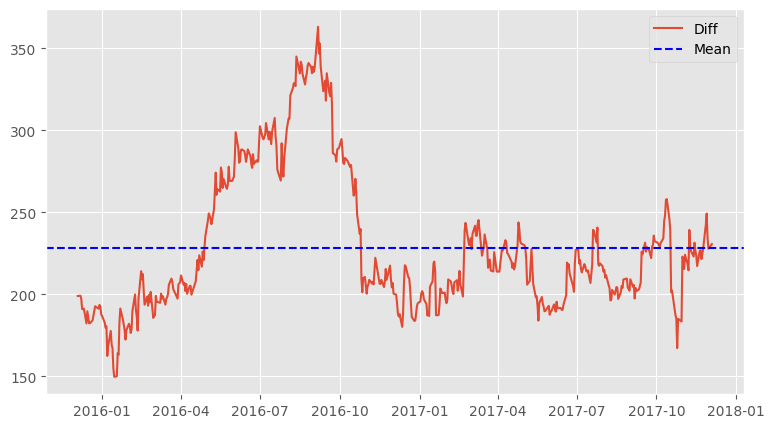

In [127]:
df_concat["differential"] = df_concat[symbol1] - df_concat[symbol2]
df_concat["ratio"] = df_concat[symbol1]/df_concat[symbol2]
df_concat["spread"] = df_concat[symbol1+"_chg"] - df_concat[symbol2+"_chg"]
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
plt.plot(df_concat.Date, df_concat.differential,label= 'Diff')
plt.axhline(y=df_concat.differential.mean(), color='b', linestyle='--', label='Mean')
plt.legend(loc='best')
plt.title('')
plt.show()

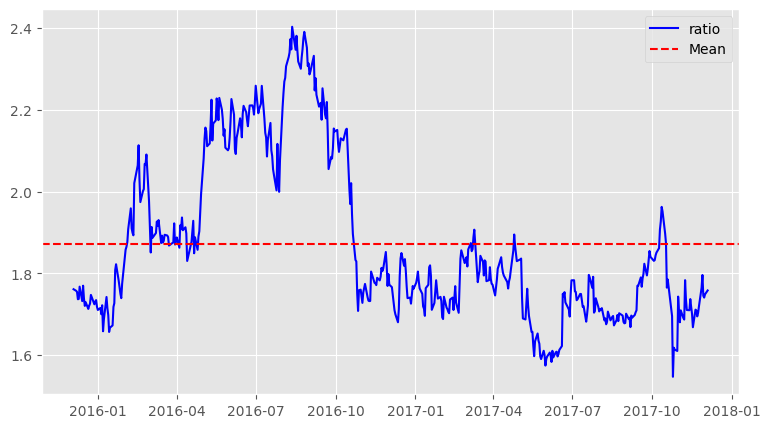

In [128]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
#plt.plot(df_concat.Date, df_concat.differential,label= 'Diff', marker = "o")
plt.plot(df_concat.Date, df_concat.ratio,label= 'ratio', color = "b")
plt.axhline(y=df_concat.ratio.mean(), color='r', linestyle='--', label='Mean')
plt.legend(loc='best')
plt.title('')
plt.show()

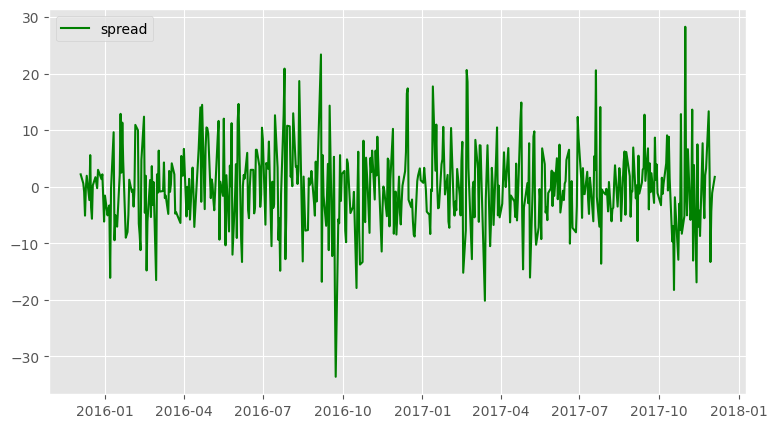

In [129]:
plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
#plt.plot(df_concat.Date, df_concat.differential,label= 'Diff', marker = "o")
plt.plot(df_concat.Date, df_concat.spread,label= 'spread', color = "g")
plt.legend(loc='best')
plt.title('')
plt.show()

### mean mode median of spread diff ratio

In [130]:
# create a summary table
df_sum = pd.DataFrame({
    "mean" : [df_concat.spread.mean(), df_concat.differential.mean(), df_concat.ratio.mean()],
    "median" : [df_concat.spread.median(), df_concat.differential.median(), df_concat.ratio.median()],
    "mode" : [df_concat.spread.mode().iloc[0], df_concat.differential.mode().iloc[0], df_concat.ratio.mode().iloc[0]],
    "S_dev":[df_concat.spread.std(), df_concat.differential.std(), df_concat.ratio.std()],}, index = ["spread", "diff", "ratio"])

df_sum


,mean,median,mode,S_dev
spread,-0.174294,-0.350000,-5.050000,7.236635
diff,228.516230,215.375000,194.650000,42.639757
ratio,1.870961,1.794941,1.547269,0.199698


In [131]:
df_sd = pd.DataFrame({
    "-3" : [-3*df_concat.spread.std() + df_concat.spread.mean(), 
            -3*df_concat.differential.std() + df_concat.differential.mean(), 
            -3*df_concat.ratio.std() + df_concat.ratio.mean()],
    "-2" : [-2*df_concat.spread.std() + df_concat.spread.mean(), 
            -2*df_concat.differential.std() + df_concat.differential.mean(), 
            -2*df_concat.ratio.std() + df_concat.ratio.mean()],
    "-1" : [-1*df_concat.spread.std() + df_concat.spread.mean(), 
            -1*df_concat.differential.std() + df_concat.differential.mean(), 
            -1*df_concat.ratio.std() + df_concat.ratio.mean()],
    "mean":[df_concat.spread.mean(), df_concat.differential.mean(), df_concat.ratio.mean()],
    "1" : [1*df_concat.spread.std() + df_concat.spread.mean(), 
            1*df_concat.differential.std() + df_concat.differential.mean(), 
            1*df_concat.ratio.std() + df_concat.ratio.mean()],
    "2" : [2*df_concat.spread.std() + df_concat.spread.mean(), 
            2*df_concat.differential.std() + df_concat.differential.mean(), 
            2*df_concat.ratio.std() + df_concat.ratio.mean()],
    "3" : [3*df_concat.spread.std() + df_concat.spread.mean(), 
            3*df_concat.differential.std() + df_concat.differential.mean(), 
            3*df_concat.ratio.std() + df_concat.ratio.mean()],
    }, index = ["spread", "diff", "ratio"])

df_sd

,-3,-2,-1,mean,1,2,3
spread,-21.884200,-14.647565,-7.410930,-0.174294,7.062341,14.298976,21.535611
diff,100.596960,143.236716,185.876473,228.516230,271.155987,313.795743,356.435500
ratio,1.271867,1.471565,1.671263,1.870961,2.070659,2.270357,2.470055


In [123]:
dict={"index": ["spread", "asdf", "asdf"] }
for i in range(-3,4, 1):
    dict[str(i)] = [i*df_concat.spread.std() + df_concat.spread.mean(), 
            i*df_concat.differential.std() + df_concat.differential.mean(), 
            i*df_concat.ratio.std() + df_concat.ratio.mean()]

In [121]:
df_dict = pd.DataFrame.from_dict(dict,)

0.31104784897974125 112.38903167497753 0.5108518593414046 2.533391275249108e-34 0.02355048712877226


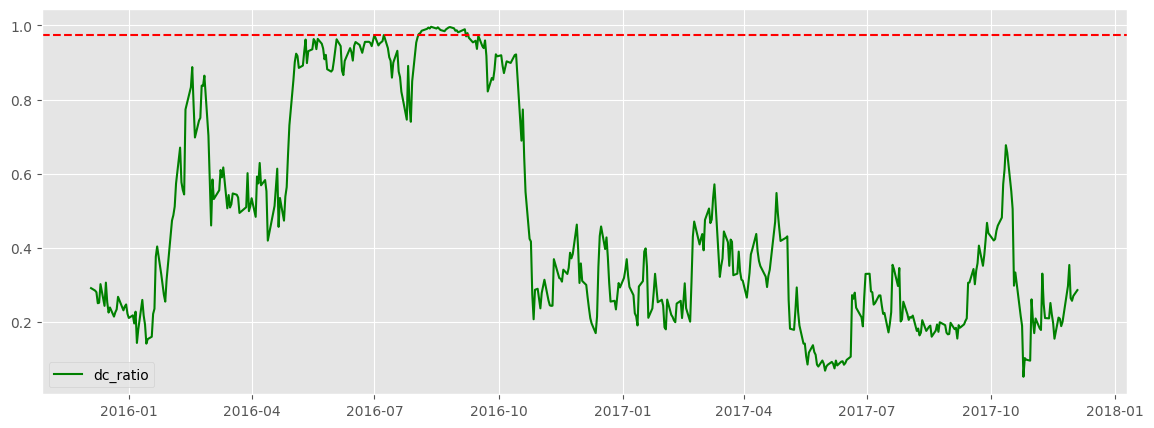

In [143]:

from scipy.stats import norm, linregress
df_concat["dc_ratio"] = norm.cdf(df_concat.ratio, loc=df_concat.ratio.mean(), scale=df_concat.ratio.std())
slope, intercept, r_value, p_value, std_err = linregress(df_concat[symbol1], df_concat[symbol2])
print(slope, intercept, r_value, p_value, std_err)
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
#plt.plot(df_concat.Date, df_concat.differential,label= 'Diff', marker = "o")
plt.plot(df_concat.Date, df_concat.dc_ratio,label= 'dc_ratio', color = "g")
plt.axhline(y=0.975, color='r', linestyle='--')
plt.legend(loc='best')
plt.title('')
plt.show()

In [144]:
start_date = date(2015, 12, 4)
end_date = date(2017, 12, 4)

symbol1 = "ICICIBANK"
symbol2 = "HDFCBANK"
# start_date = date(2020, 7, 25)
# end_date = date(2023, 7, 25)
# symbol1 = "EXIDEIND"
# symbol2 = "AMARAJABAT"
df_hdfc = eq.get_price(start_date, end_date, symbol=symbol1)
df_hdfc["abs_change"] = df_hdfc["Close Price"] - df_hdfc["Open Price"]
df_icici = eq.get_price(start_date, end_date, symbol=symbol2)
df_icici["abs_change"] = df_icici["Close Price"] - df_icici["Open Price"]
df_hdfc = df_hdfc[["Date", "Close Price", "abs_change"]]
df_hdfc = df_hdfc.rename(columns={'Close Price': symbol1, 'abs_change': symbol1+"_chg"})
df_icici = df_icici[["Close Price", "abs_change"]]
df_icici = df_icici.rename(columns={'Close Price': symbol2, 'abs_change': symbol2+"_chg"})
df_concat = pd.concat([df_hdfc, df_icici], axis=1)

#### Get Error ratio
The decision to designate X and Y to stocks depends on the value of the error ratio. The lower the better. Since HDFC as X and ICICI as y offers the lowest error ratio, we will designate HDFC as the independent variable (X) and ICICI as the dependent variable (Y)

In [164]:
# do the linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_concat[symbol1], df_concat[symbol2])
print(slope, intercept, r_value, p_value, std_err)
#predict the price using
df_concat["pred_"+symbol2] = df_concat[symbol1]*slope + intercept 
# calculate residuals and its sd
df_concat["residuals"] = df_concat[symbol2] - df_concat["pred_"+symbol2]
print(df_concat.residuals.std())

import statsmodels.api as sm # !pip install statsmodels
df_concat['intercept'] = 1

# Perform linear regression using statsmodels
model = sm.OLS(df_concat[symbol2], df_concat[['intercept', symbol1]]).fit()
# now calcuate error ratio
er_ratio_symb1_symb2 = model.bse[0]/df_concat.residuals.std()
# now reverse symbol 1 and 2
slope, intercept, r_value, p_value, std_err = linregress(df_concat[symbol2], df_concat[symbol1])
print(slope, intercept, r_value, p_value, std_err)
df_concat["pred_"+symbol1] = df_concat[symbol2]*slope + intercept 
df_concat["residuals"] = df_concat[symbol1] - df_concat["pred_"+symbol1]
print(df_concat.residuals.std())
import statsmodels.api as sm # !pip install statsmodels
df_concat['intercept'] = 1

# Perform linear regression using statsmodels
model = sm.OLS(df_concat[symbol1], df_concat[['intercept', symbol2]]).fit()
er_ratio_symb2_symb1 = model.bse[0]/df_concat.residuals.std()

# compare the error ration to see which stock to choose as X
if er_ratio_symb1_symb2 > er_ratio_symb2_symb1:
    print(f"{symbol1} as X has more error ratio {er_ratio_symb1_symb2} than{er_ratio_symb2_symb1} so choose {symbol2} as X")
    slope, intercept, r_value, p_value, std_err = linregress(df_concat[symbol2], df_concat[symbol1])
    #print(slope, intercept, r_value, p_value, std_err)
    df_concat["pred_"+symbol1] = df_concat[symbol2]*slope + intercept 
    df_concat["residuals"] = df_concat[symbol1] - df_concat["pred_"+symbol1]
else:
    print(f"{symbol1} as X has less error ratio {er_ratio_symb1_symb2} than{er_ratio_symb2_symb1} so choose {symbol1} as X")
    slope, intercept, r_value, p_value, std_err = linregress(df_concat[symbol1], df_concat[symbol2])
    #print(slope, intercept, r_value, p_value, std_err)
    df_concat["pred_"+symbol2] = df_concat[symbol1]*slope + intercept 
    df_concat["residuals"] = df_concat[symbol2] - df_concat["pred_"+symbol2]


7.613638909228674 -663.6770525267164 0.8314430612982262 3.5565430207835295e-128 0.2289108173831139
152.66525529931187
0.09079726165408603 142.4677666042669 0.8314430612982262 3.5565430207835295e-128 0.0027299003313897563
16.671721463711293
ICICIBANK as X has more error ratio 0.40182106846059523 than0.22779949297895144 so choose HDFCBANK as X


if residuals are stationary. If the residuals are not stationary, regression relation shouldn’t be used.
#### Check by ADF test

In [165]:
from statsmodels.tsa.stattools import adfuller
  # Non-stationary time series

# Perform the ADF test
result = adfuller(df_concat.residuals)

# Extract test statistics and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Test Statistic:", test_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value <= 0.05:
    print("The time series is likely stationary (reject the null hypothesis).")
else:
    print("The time series is likely non-stationary (fail to reject the null hypothesis).")


ADF Test Statistic: -3.510762923009504
P-value: 0.007714943742623976
The time series is likely stationary (reject the null hypothesis).


In [123]:
def find_value_by_key(data, target_key):
    #data = {"symbol":[], "CompanyName":[]}
    
    for key, value in data.items():
        if key == target_key:
            return value
        if isinstance(value, dict):
            # If the value is a dictionary, recursively search for the target key
            found_value = find_value_by_key(value, target_key)
            if found_value is not None:
                return found_value
            
data_symb = {"symbol":[]}
# Query the JSON object for a specific key-value pair
for data_name, data_content in f_dict.items():
    target_value = find_value_by_key(data_content, "symbol")
    data_symb["symbol"].append(target_value)

In [124]:
data_symb

{'symbol': [None, None, 'SRPL-RE', None, None, None, None, None]}

In [103]:
data_f = data["data"]
data_df = data_f.to_frame()

In [110]:
data_f.values[1]

{'metadata': {'symbol': 'KRITINUT',
  'identifier': 'KRITINUTEQN',
  'purpose': None,
  'lastPrice': 77.1,
  'change': 12.849999999999994,
  'pChange': 19.99999999999999,
  'previousClose': 64.25,
  'finalQuantity': 32699,
  'totalTurnover': 2521092.9,
  'marketCap': '-',
  'yearHigh': 70,
  'yearLow': 37.25,
  'iep': 77.1,
  'chartTodayPath': '-'},
 'detail': {'preOpenMarket': {'preopen': [{'price': 64.25,
     'buyQty': 0,
     'sellQty': 1},
    {'price': 66.7, 'buyQty': 0, 'sellQty': 355},
    {'price': 67, 'buyQty': 0, 'sellQty': 250},
    {'price': 67.4, 'buyQty': 0, 'sellQty': 245},
    {'price': 75.15, 'buyQty': 10, 'sellQty': 0},
    {'price': 76, 'buyQty': 250, 'sellQty': 0},
    {'price': 77, 'buyQty': 926, 'sellQty': 0},
    {'price': 77.1, 'buyQty': 430730, 'sellQty': 0, 'iep': True}],
   'ato': {'totalBuyQuantity': 83884, 'totalSellQuantity': 11},
   'IEP': 77.1,
   'totalTradedVolume': 32699,
   'finalPrice': 77.1,
   'finalQuantity': 32699,
   'lastUpdateTime': '24-Jul-

The value for key 'city' is 'SRPL-RE'


In [92]:
f_dict = data.to_dict()
f_json  = data.to_json()

In [93]:
f_dict["data"][0]["metadata"]

{'symbol': 'SRPL-RE',
 'identifier': 'SRPL-REBEN',
 'purpose': None,
 'lastPrice': 0.1,
 'change': 0.05,
 'pChange': 100,
 'previousClose': 0.05,
 'finalQuantity': 30000,
 'totalTurnover': 3000,
 'marketCap': '-',
 'yearHigh': 0.4,
 'yearLow': 0.05,
 'iep': 0.1,
 'chartTodayPath': '-'}

In [97]:
import jmespath

ModuleNotFoundError: No module named 'jmespath'

In [73]:
import json
y = json.loads(f)

In [74]:
y["symbol"]

KeyError: 'symbol'

In [51]:
metadata = data["data"]

In [54]:
g= metadata.to_dict()

In [59]:
g[0]["metadata"]["symbol"]

'SRPL-RE'